# Indicator Function

Checking if indicator function is properly defined using python.

In [25]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt

from dolfin import *
import math as m
import numpy as np

# want to check that a(utilde, u_, t) works properly

nx = 100
P = 2 

mesh = UnitSquareMesh(nx,nx)
h = CellDiameter(mesh)
Q = FunctionSpace(mesh, "CG", P)

def a(u_tilde, u_, t):
    indicator = Expression('sqrt((a-b)*(a-b))', degree = 2, a = u_, b = u_tilde)
    indicator = interpolate(indicator, Q)
    plot(indicator)
    max_ind = np.amax(indicator.vector().get_local())
    print(max_ind)
    # Normalize indicator such that it's between [0,1].
    if max_ind < 1:
       max_ind = 1.0
    print(max_ind)
    indicator = Expression('a/b', degree = 2, a = indicator, b = max_ind)

    indicator = interpolate(indicator, Q) 
    indicator.rename('a','a')

    return indicator

folder = "indfn"

out_file_utilde = File(folder+"/utilde.pvd")
out_file_ubar = File(folder+"/ubar.pvd")
out_file_ind = File(folder+"/ind.pvd") 

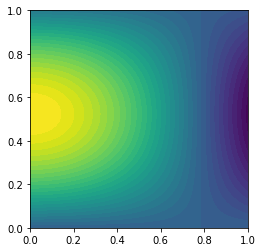

In [20]:
u_tilde = Expression('cos(2*x[0])*sin(3*x[1])', degree = 2)
proj_utilde = interpolate(u_tilde,Q)
plot(proj_utilde)
out_file_utilde << proj_utilde

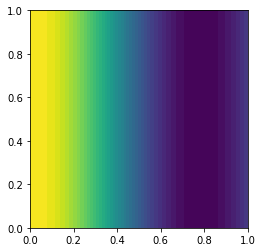

In [3]:
u_ = Expression('cos(4*x[0])', degree = 2)
proj_u = interpolate(u_,Q)
plot(proj_u)
out_file_ubar << proj_u

1.12499334205


1.0

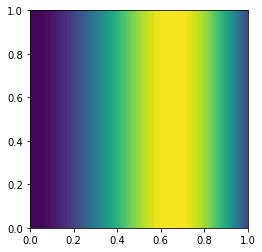

In [4]:
ind = a(u_tilde,u_,0.0)
plot(ind)
out_file_ind << ind

np.amax(ind.vector().get_local())

In [7]:
type(u_)

dolfin.functions.expression.CompiledExpression

In [8]:
help(u_)

Help on CompiledExpression in module dolfin.functions.expression object:

class CompiledExpression(Expression, ufl.coefficient.Coefficient, dolfin_ac06630b816a38a4f7286f9023ab6c2be47a63e4.dolfin_ac06630b816a38a4f7286f9023ab6c2be47a63e4.Expression_7703c56956721e5d4e15cf9dfd821c37b3074dfa)
 |  Method resolution order:
 |      CompiledExpression
 |      Expression
 |      ufl.coefficient.Coefficient
 |      ufl.core.terminal.FormArgument
 |      ufl.core.terminal.Terminal
 |      ufl.core.expr.Expr
 |      dolfin_ac06630b816a38a4f7286f9023ab6c2be47a63e4.dolfin_ac06630b816a38a4f7286f9023ab6c2be47a63e4.Expression_7703c56956721e5d4e15cf9dfd821c37b3074dfa
 |      dolfin.cpp.function.Expression
 |      dolfin.cpp.function.GenericFunction
 |      dolfin.cpp.function.ufc_function
 |      dolfin.cpp.common.Variable
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, cppcode, *args, **kwargs)
 |      Initialize the Expression
 |  
 |  ---------------------------------

In [17]:
import numpy
fs = Expression("sin(x[0])*cos(x[1])", element='CG')
x0 = (1.,0.5)
x1 = [1.,0.5]
x2 = numpy.array([1.,0.5])
v0 = fs(x0)
v1 = fs(x1)
v2 = fs(x2)

TypeError: The 'element' argument must be a UFL finite element.

In [13]:
print(v0)

0.738460262604


In [14]:
print(v1)

0.738460262604


In [15]:
print(v2)

0.738460262604


In [31]:
u = [1,2,3]
v = [100,200,300]
max_ind = np.amax(u)
print(max_ind)


3


In [33]:
abs_ind = Expression('abs(a-b)', degree = 2, a = u, b = v)

--- Instant: compiling ---
In instant.recompile: The module did not compile with command 'make VERBOSE=1', see '/home/kmbicol/anaconda2/envs/fenics/.cache/instant/error/dolfin_0f656d0316c763c21ee5df6c305ba10944c3d8f1/compile.log'


RuntimeError: In instant.recompile: The module did not compile with command 'make VERBOSE=1', see '/home/kmbicol/anaconda2/envs/fenics/.cache/instant/error/dolfin_0f656d0316c763c21ee5df6c305ba10944c3d8f1/compile.log'